In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import math
from sklearn.model_selection import cross_validate

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
old_data = pd.read_csv('Old_data.csv', sep=',')
model_data = pd.read_csv('MLRdata_without_clubs.csv', sep=',')
y = model_data['fee_cleaned']
X = model_data.drop(columns =['fee_cleaned'])
z = model_data[['buying_league_Championship', 'buying_league_Eredivisie', 'buying_league_Liga Nos','buying_league_Ligue 1','buying_league_Premier League','buying_league_Primera Division','buying_league_Serie A']]
y_log = np.log(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 1)
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.20, random_state = 1)
X_train_log_base, X_test_log_base, y_train_log_base, y_test_log_base = train_test_split(z, y_log, test_size=0.20, random_state = 1)

#Standard Scaling only on the train set rather than the whole dataset (https://stats.stackexchange.com/questions/111467/is-it-necessary-to-scale-the-target-value-in-addition-to-scaling-features-for-re)
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [3]:
#Simple Linear Regression
lr = LinearRegression()
final_base = cross_validate(lr, X_train_log_base, y_train_log_base, cv=10, scoring=('r2','neg_root_mean_squared_error'), return_train_score=True)
print('Simple Linear Regression: Cross Validation')
print('R^2:', final_base['test_r2'].mean())
print('RMSE:', -1 * final_base['test_neg_root_mean_squared_error'].mean())
lr.fit(X_train_log_base, y_train_log_base)
y_pred = lr.predict(X_test_log_base)

y_pred_exp = np.exp(y_pred)
y_test_log_base_exp = np.exp(y_test_log_base)

r2_score_base = r2_score(y_test_log_base, y_pred)
mse = mean_squared_error(y_test_log_base_exp, y_pred_exp)
rmse_base = math.sqrt(mse)
print()
print('Simple Linear Regression: Test')
print('R^2:', r2_score_base)
print('RMSE:', rmse_base)

Simple Linear Regression: Cross Validation
R^2: 0.20366733729528058
RMSE: 1.2218768120797026

Simple Linear Regression: Test
R^2: 0.18907896994015416
RMSE: 10.439153356690955


In [4]:
#Multiple Linear Regression
lr = LinearRegression()
final_mlr = cross_validate(lr, X_train_log, y_train_log, cv=10, scoring=('r2','neg_root_mean_squared_error'), return_train_score=True)
print('Multiple Linear Regression: Cross Validation')
print('R^2:', final_mlr['test_r2'].mean())
print('RMSE:', -1 * final_mlr['test_neg_root_mean_squared_error'].mean())
lr.fit(X_train_log, y_train_log)
y_test_pred = lr.predict(X_test_log)

y_test_pred_exp = np.exp(y_test_pred)
y_test_log_exp = np.exp(y_test_log)

r2_score_mlr = r2_score(y_test_log, y_test_pred)
mse_test = mean_squared_error(y_test_log_exp, y_test_pred_exp)
rmse_mlr = math.sqrt(mse_test)
print()
print('Multiple Linear Regression: Test')
print('R^2:', r2_score_mlr)
print('RMSE:', rmse_mlr)

Multiple Linear Regression: Cross Validation
R^2: 0.6004390004264092
RMSE: 0.8642721165380705

Multiple Linear Regression: Test
R^2: 0.6152762518734943
RMSE: 6.322265555182988


In [12]:
#Support Vector Regression
final_svr = SVR(C= 38, epsilon= 0.3, gamma = 0.001, kernel= 'rbf')
X_train_log_stan = sc_X.fit_transform(X_train_log)
X_test_log_stan = sc_X.fit_transform(X_test_log)
final_svr_cv = cross_validate(final_svr, X_train_log_stan, y_train_log, cv=10, scoring=('r2', 'neg_root_mean_squared_error'), return_train_score=True)
print('SVR: Cross Validation')
print('R^2:', final_svr_cv['test_r2'].mean())
print('RMSE:', -1 * final_svr_cv['test_neg_root_mean_squared_error'].mean())
final_svr.fit(X_train_log_stan, y_train_log)
predictions_test = final_svr.predict(X_test_log_stan)

y_pred_exp = np.exp(predictions_test)
y_test_exp = np.exp(y_test_log)

r2_score_svr = r2_score(y_test_exp, y_pred_exp)
mse_test = mean_squared_error(y_test_exp, y_pred_exp)
rmse_svr = math.sqrt(mse_test)
print()
print('SVR: test set')
print('R^2:', r2_score_svr)
print('RMSE:', rmse_svr)

SVR: Cross Validation
R^2: 0.6204354509566915
RMSE: 0.8428912243895791

SVR: test set
R^2: 0.6196559906351666
RMSE: 6.508071132562496


In [6]:
#Random Forest Regression
final_rf = RandomForestRegressor(bootstrap = True, max_depth = 60, max_features = 'auto', min_samples_leaf = 2, min_samples_split = 2, n_estimators = 176, random_state = 1)

final_rf_cv = cross_validate(final_rf, X_train, y_train, cv=10, scoring=('r2', 'neg_root_mean_squared_error'), return_train_score=True)
print('RF: Cross Validation')
print('R^2:', final_rf_cv['test_r2'].mean())
print('RMSE:', -1 * final_rf_cv['test_neg_root_mean_squared_error'].mean())

final_rf.fit(X_train, y_train)

predictions_test_set = final_rf.predict(X_test)
r2_score_rf = r2_score(y_test, predictions_test_set)
mse_test_set = mean_squared_error(y_test, predictions_test_set)
rmse_rf = math.sqrt(mse_test_set)
print()
print('RF: test set')
print('R^2:', r2_score_rf)
print('RMSE:', rmse_rf)

RF: Cross Validation
R^2: 0.6226687935553712
RMSE: 6.844633302022444

RF: test set
R^2: 0.6784610680242718
RMSE: 5.983851172079099


In [7]:
data = {'RMSE': [rmse_base,rmse_mlr,rmse_svr,rmse_rf],
        'R2': [r2_score_base,r2_score_mlr,r2_score_svr,r2_score_rf]
}
df = pd.DataFrame(data, index = ['Baseline', 'Multiple Linear Regression', 'Support Vector Regression', 'Random Forest Regression'])

df

,RMSE,R2
Baseline,10.439153,0.189079
Multiple Linear Regression,6.322266,0.615276
Support Vector Regression,6.595922,0.609318
Random Forest Regression,5.979501,0.678928


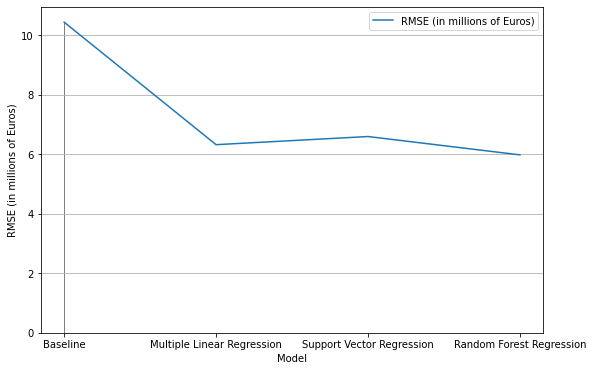

In [18]:
import matplotlib.pyplot as plt
dict_plot_frame = df.to_dict()
dict_plot_frame = dict_plot_frame.get('RMSE')
import matplotlib.pyplot as plt
keys = list(dict_plot_frame.keys())
values = list(dict_plot_frame.values())
fig = plt.figure(figsize=(9, 6))
plt.plot(keys, values)
plt.bar(keys, values, width = 0.005, color = 'grey')
plt.grid(axis = 'y')
plt.xlabel('Model')
plt.ylabel('RMSE (in millions of Euros)')
plt.legend(['RMSE'])
plt.legend(['RMSE (in millions of Euros)'])

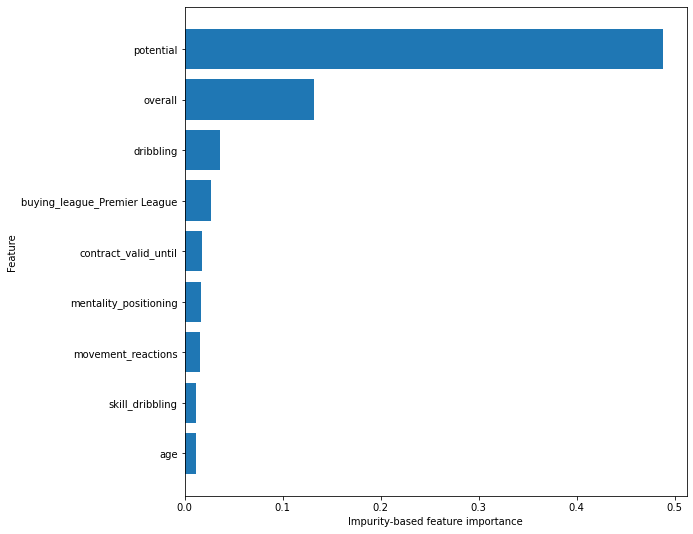

In [3]:
# get importance
importance = final_rf.feature_importances_
# summarize feature importance
#https://stackoverflow.com/questions/34649969/how-to-find-the-features-names-of-the-coefficients-using-scikit-linear-regressio
coef_dict = {}
for coef, feat in zip(final_rf.feature_importances_,X):
    coef_dict[feat] = coef
import pandas as pd
coef_dataframe = pd.DataFrame.from_dict(coef_dict, orient='index')
order_dataframe = coef_dataframe.sort_values(by=[0])
order_dataframe = order_dataframe.round(8)
plot_frame = order_dataframe[(order_dataframe > 0.0108).all(1)]
dict_plot_frame = plot_frame.to_dict()
dict_plot_frame = dict_plot_frame.get(0)
import matplotlib.pyplot as plt
keys = list(dict_plot_frame.keys())
values = list(dict_plot_frame.values())
fig = plt.figure(figsize=(9, 9))
  
# creating the bar plot
plt.barh(keys, values)
plt.xlabel('Impurity-based feature importance')
plt.ylabel('Feature')
plt.show()

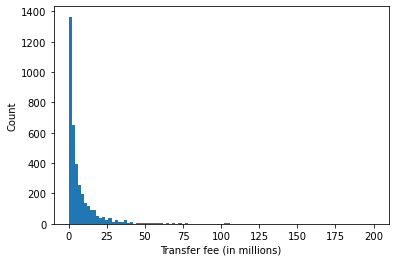

In [11]:
plt.hist(y, bins = 100)
plt.xlabel('Transfer fee (in millions)')
plt.ylabel('Count')
plt.show()

In [12]:
model_data['fee_cleaned'].describe()

count    3636.000000
mean        7.141985
std        11.410079
min         0.023000
25%         1.350000
50%         3.150000
75%         8.550000
max       199.800000
Name: fee_cleaned, dtype: float64

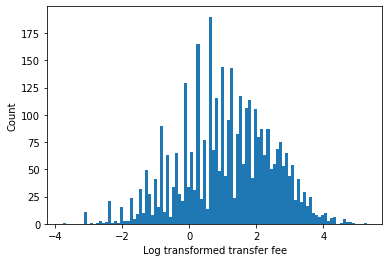

In [13]:
plt.hist(y_log, bins = 100)
plt.xlabel('Log transformed transfer fee')
plt.ylabel('Count')
plt.show()

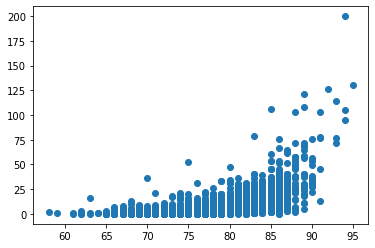

In [15]:
import matplotlib.pyplot as plt
plt.scatter(model_data['potential'],model_data['fee_cleaned'])